
# Fisher’s Iris Dataset Analysis

## 1. Goal
This assignment requires learners to:
- Understand the basic flow of data analysis
- Get familiar with the data analysis library **Pandas**

## 2. Iris Dataset
The dataset consists of 150 samples from three iris species.  
Features recorded: **sepal_length, sepal_width, petal_length, petal_width**.


## 3. Dataset Preparation
Load the dataset via `sklearn.datasets.load_iris`, storing features in `X` and the target in `y`, and then concatenating into `df`.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# Features DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Target DataFrame
y = pd.DataFrame(iris.target, columns=["Species"])

# Combined DataFrame
df = pd.concat([X, y], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4. Data Overview

- Display the first 4 samples
- Check info and missing values
- Summary statistics
- Counts per target label


In [ ]:
# First 4 samples
display(df.head(4))

# Info (types, non-nulls)
df.info()

# Missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Summary statistics
display(df.describe())

# Counts per species
print("\nCounts per Species:")
print(df["Species"].value_counts())

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Counts per Species:
Species
0    50
1    50
2    50
Name: count, dtype: int64


## 5. Feature Exploration - Extracting Data
Selecting columns/rows and conditional filtering.

In [ ]:
# (A) Selecting a single column (two ways)
_ = df["sepal_width"].head(3)
_ = df.sepal_width.head(3)

# (B) Rows 50 through 99 (by position)
rows_50_99 = df.iloc[50:100]  # 50..99 inclusive by Python slicing rules
display(rows_50_99.head())

# (C) 'petal_length' for rows 50..99
pl_50_99 = df.loc[50:99, "petal_length"]  # label-based inclusive end
display(pl_50_99.head())

# (D) Rows where petal_width == 0.2
pw_eq_02 = df[df["petal_width"] == 0.2]
display(pw_eq_02.head())

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Visualization - Distributions

- Pie chart of counts per Species
- Box plots of each feature by Species
- Violin plots of each feature by Species


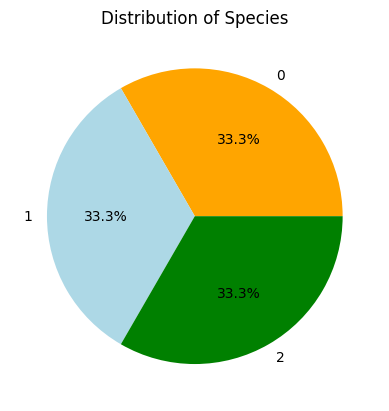

In [ ]:
import matplotlib.pyplot as plt

# Pie chart of species distribution
species_counts = df["Species"].value_counts().sort_index()
plt.title("Distribution of Species")
colors = ["orange", "lightblue", "green"]
plt.pie(species_counts, labels=species_counts.index, autopct="%.1f%%", colors=colors)
plt.show()

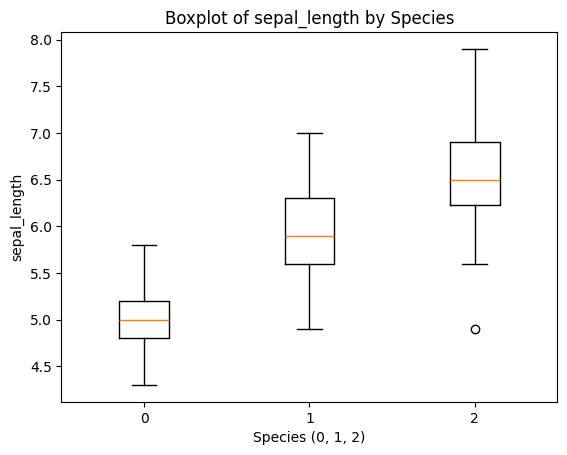

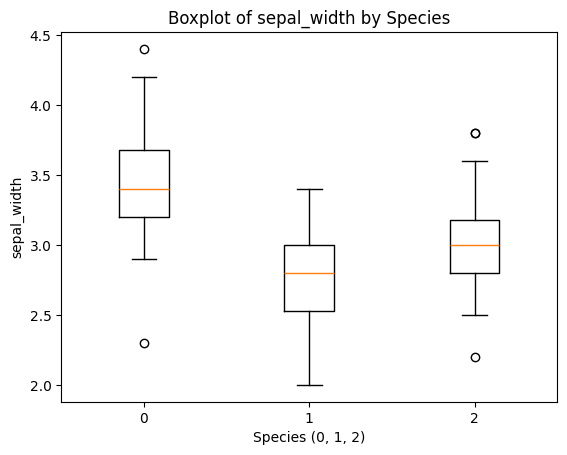

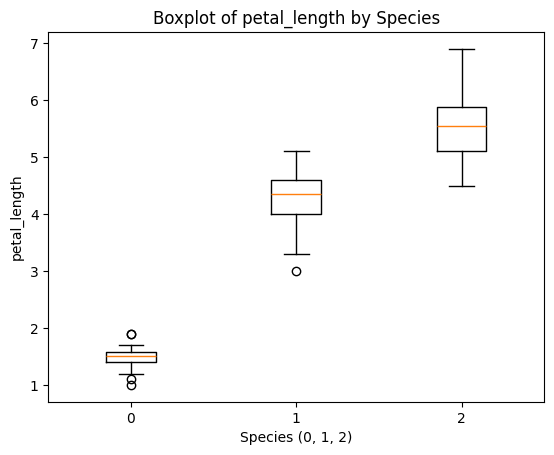

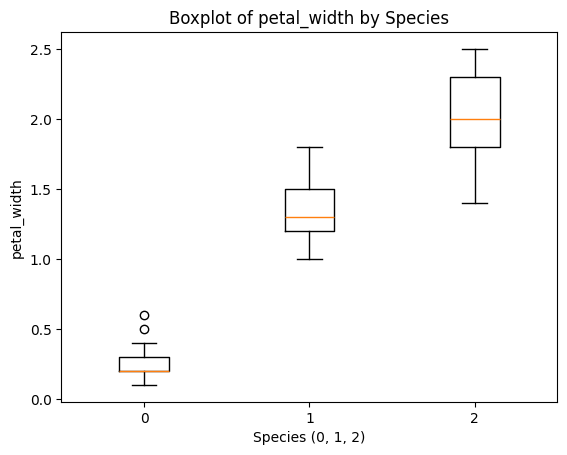

In [ ]:
# Box plots by Species for each feature (one chart per feature)
for col in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    data = [df[df["Species"] == s][col].values for s in sorted(df["Species"].unique())]
    plt.title(f"Boxplot of {col} by Species")
    plt.xlabel("Species (0, 1, 2)")
    plt.ylabel(col)
    plt.boxplot(data, positions=[0,1,2])
    plt.show()

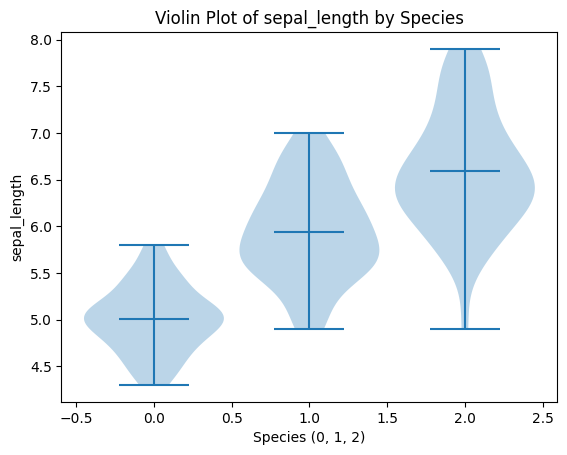

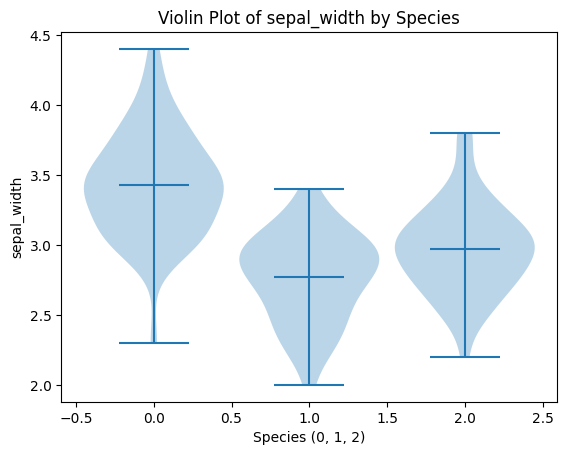

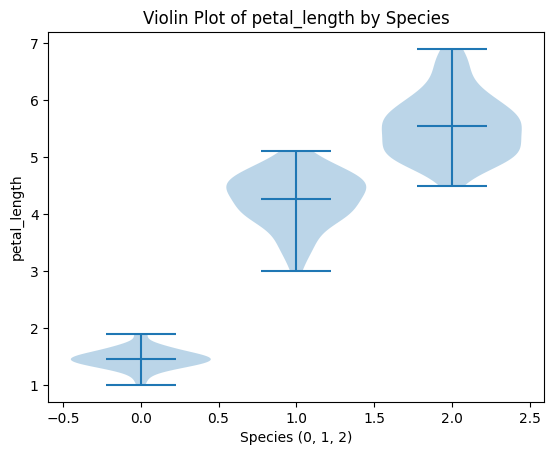

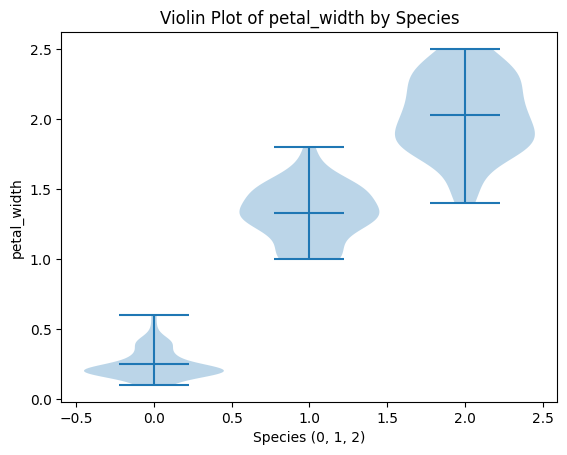

In [ ]:
# Violin plots by Species for each feature (one chart per feature)
for col in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    data = [df[df["Species"] == s][col].values for s in sorted(df["Species"].unique())]
    plt.title(f"Violin Plot of {col} by Species")
    plt.xlabel("Species (0, 1, 2)")
    plt.ylabel(col)
    plt.violinplot(dataset=data, positions=[0,1,2], showmeans=True, widths=0.9)
    plt.show()

## 7. Relationships Between Features

- Scatter plots for all 6 feature pairs, with points colored by Species
- A “scatterplot matrix” alternative: draw the 6 combinations as separate charts sequentially
- Correlation coefficient matrix and heatmap

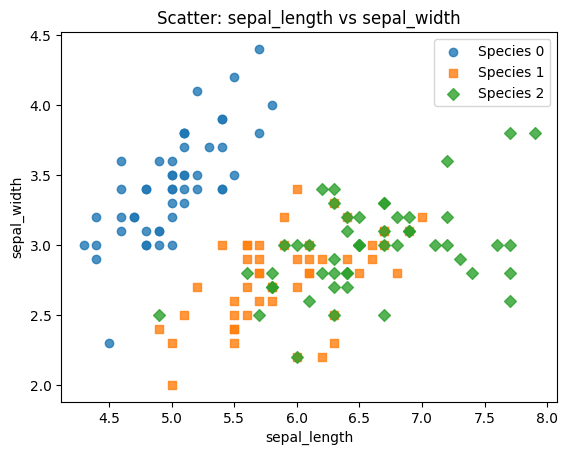

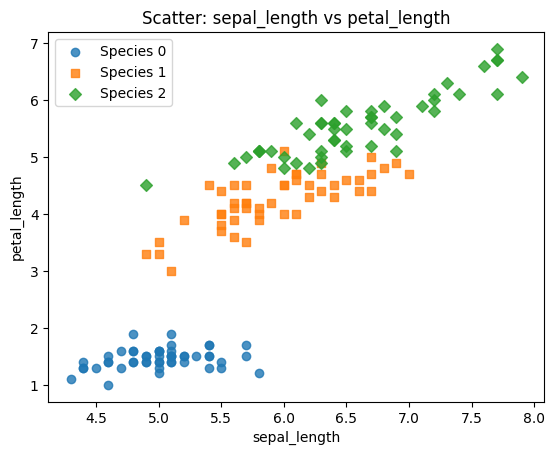

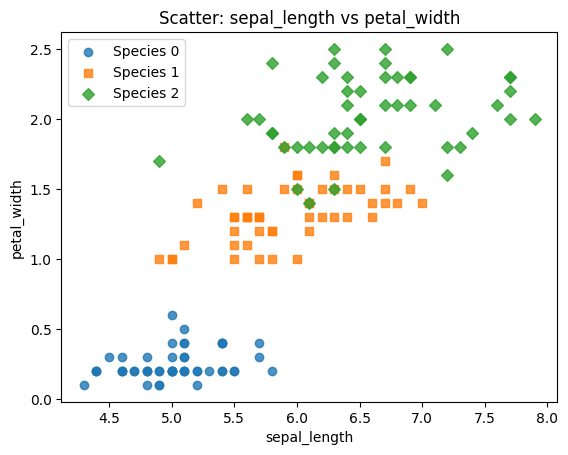

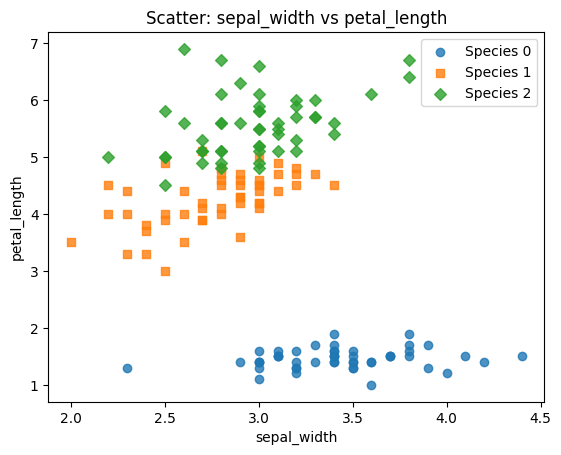

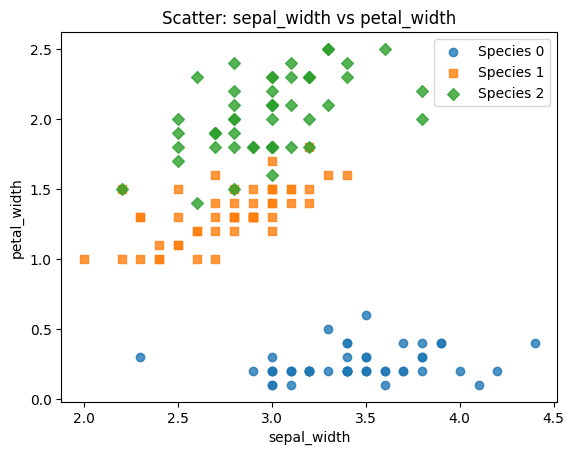

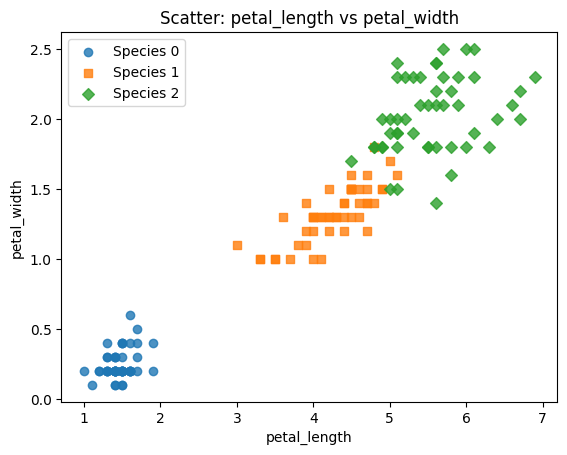

In [ ]:
# Scatter plots for pairs
species_vals = sorted(df["Species"].unique())
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
pairs = [("sepal_length","sepal_width"),
         ("sepal_length","petal_length"),
         ("sepal_length","petal_width"),
         ("sepal_width","petal_length"),
         ("sepal_width","petal_width"),
         ("petal_length","petal_width")]

for xcol, ycol in pairs:
    plt.title(f"Scatter: {xcol} vs {ycol}")
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    for s, marker in zip(species_vals, ["o", "s", "D"]):
        sub = df[df["Species"] == s]
        plt.scatter(sub[xcol], sub[ycol], marker=marker, label=f"Species {s}", alpha=0.8)
    plt.legend()
    plt.show()

## 8. Correlation Matrix and Heatmap
Compute the correlation coefficients across the four features and visualize as a heatmap.

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


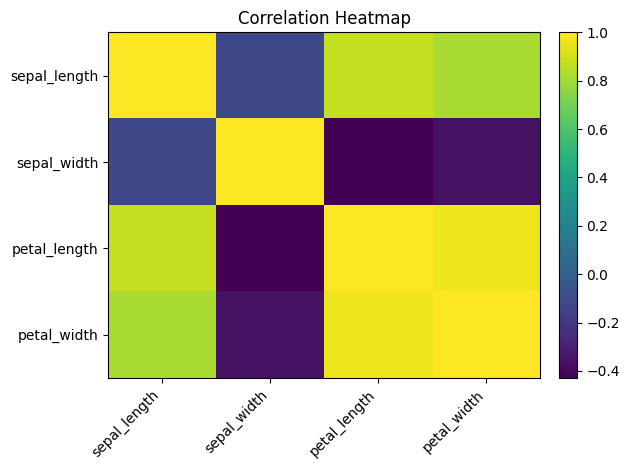

In [ ]:
corr = df[["sepal_length","sepal_width","petal_length","petal_width"]].corr()
print(corr)

plt.title("Correlation Heatmap")
im = plt.imshow(corr.values, interpolation="nearest", aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

## 9. For Future
Consider using categorical variables to rename the species instead of working with Species O, 1, 2.

Also work with subplots to make comparisons easier and leave a neat notebook.

It would make more sense to the end-user.
